    Name       : KURUKOOTI CHANDRA KARTHIK
                 (K.C.Karthik-G27 python)
    Batch Name : Python & Machine Learning Basic Applications
                        SURE Trust
        

                                               ** MINI PROJECT **
                                       (on student performance prediction)

# Problem Statement

# Given Data-Set

In [1]:
import pandas as pd
import numpy as np

num_students = 80
num_subjects = np.random.randint(6, 9)  

data = {
    'Class': [],
    'Student_ID': [],
    'Name': []
}
for i in range(1, num_students + 1):
    data['Class'].append('Class A')
    data['Student_ID'].append(i)
    data['Name'].append(f'Student_{i}')
    for j in range(1, num_subjects + 1):
        data[f'Subject_{j}'] = np.random.randint(0, 101, num_students)


df = pd.DataFrame(data)

for _ in range(30):  
    row_idx = np.random.randint(0, num_students)
    col_idx = np.random.randint(3, df.shape[1])  
    df.iat[row_idx, col_idx] = np.nan

df

,Class,Student_ID,Name,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8
0,Class A,1,Student_1,94.0,97.0,98.0,38.0,63.0,65.0,51.0,33.0
1,Class A,2,Student_2,66.0,74.0,94.0,55.0,97.0,7.0,25.0,46.0
2,Class A,3,Student_3,37.0,85.0,28.0,50.0,44.0,NaN,26.0,95.0
3,Class A,4,Student_4,NaN,42.0,31.0,32.0,95.0,46.0,22.0,86.0
4,Class A,5,Student_5,29.0,58.0,12.0,89.0,43.0,23.0,45.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...
75,Class A,76,Student_76,56.0,71.0,65.0,23.0,NaN,17.0,7.0,24.0
76,Class A,77,Student_77,19.0,58.0,18.0,18.0,22.0,81.0,16.0,36.0
77,Class A,78,Student_78,19.0,82.0,21.0,19.0,62.0,5.0,23.0,3.0
78,Class A,79,Student_79,13.0,38.0,9.0,4.0,17.0,33.0,74.0,76.0


Observation : Data was loaded

# Data Export

In [2]:
# data exported from the dataframe to a CSV file
df.to_csv("student_marks.csv", index=True)

 Observation : Data was Exported to the file 'student_marks.csv' successfully

# Data Pre-processing

Data pre-processing is used to extract the useful features for an effective model to make predictions.

In [3]:
# Load the data from the CSV file into a new dataframe
my_df = pd.read_csv("student_marks.csv")
my_df

,Unnamed: 0,Class,Student_ID,Name,Subject_1,Subject_2,Subject_3,Subject_4,Subject_5,Subject_6,Subject_7,Subject_8
0,0,Class A,1,Student_1,94.0,97.0,98.0,38.0,63.0,65.0,51.0,33.0
1,1,Class A,2,Student_2,66.0,74.0,94.0,55.0,97.0,7.0,25.0,46.0
2,2,Class A,3,Student_3,37.0,85.0,28.0,50.0,44.0,NaN,26.0,95.0
3,3,Class A,4,Student_4,NaN,42.0,31.0,32.0,95.0,46.0,22.0,86.0
4,4,Class A,5,Student_5,29.0,58.0,12.0,89.0,43.0,23.0,45.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,75,Class A,76,Student_76,56.0,71.0,65.0,23.0,NaN,17.0,7.0,24.0
76,76,Class A,77,Student_77,19.0,58.0,18.0,18.0,22.0,81.0,16.0,36.0
77,77,Class A,78,Student_78,19.0,82.0,21.0,19.0,62.0,5.0,23.0,3.0
78,78,Class A,79,Student_79,13.0,38.0,9.0,4.0,17.0,33.0,74.0,76.0


In [4]:
# Rename columns
my_df = my_df.rename(columns={"Student_ID": "StudentID", "Name": "StudentName"})
for column in my_df.columns:
    if column.startswith("Subject_"):
        my_df = my_df.rename(columns={column: column.replace("Subject_", "Subject")})

In [5]:
my_df.head()

,Unnamed: 0,Class,StudentID,StudentName,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8
0,0,Class A,1,Student_1,94.0,97.0,98.0,38.0,63.0,65.0,51.0,33.0
1,1,Class A,2,Student_2,66.0,74.0,94.0,55.0,97.0,7.0,25.0,46.0
2,2,Class A,3,Student_3,37.0,85.0,28.0,50.0,44.0,NaN,26.0,95.0
3,3,Class A,4,Student_4,NaN,42.0,31.0,32.0,95.0,46.0,22.0,86.0
4,4,Class A,5,Student_5,29.0,58.0,12.0,89.0,43.0,23.0,45.0,15.0


In [6]:
my_df.tail()

,Unnamed: 0,Class,StudentID,StudentName,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8
75,75,Class A,76,Student_76,56.0,71.0,65.0,23.0,NaN,17.0,7.0,24.0
76,76,Class A,77,Student_77,19.0,58.0,18.0,18.0,22.0,81.0,16.0,36.0
77,77,Class A,78,Student_78,19.0,82.0,21.0,19.0,62.0,5.0,23.0,3.0
78,78,Class A,79,Student_79,13.0,38.0,9.0,4.0,17.0,33.0,74.0,76.0
79,79,Class A,80,Student_80,41.0,18.0,70.0,56.0,0.0,5.0,93.0,8.0


Observation : By using head and tail of the dataframe to check whether is thier any NaN values present in the given data set. and here i observed that the given dataframe contains NaN values.

In [7]:
my_df.isna().sum()

Unnamed: 0     0
Class          0
StudentID      0
StudentName    0
Subject1       1
Subject2       3
Subject3       3
Subject4       1
Subject5       5
Subject6       8
Subject7       4
Subject8       4
dtype: int64

Observation : I checked the total no. of NaN values present in each feature

In [8]:
# Handle missing values by filling with column mean value to that NaN values

columns=['Subject1','Subject2', 'Subject3', 'Subject4', 'Subject5', 'Subject6', 'Subject7','Subject8']

# Iterate over the list of column names present in the dataset to fill the mean values inplace of NaN values.

for column in columns:
    my_df[column].fillna(my_df[column].mean(), inplace=True)

In [9]:
my_df.head()

,Unnamed: 0,Class,StudentID,StudentName,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8
0,0,Class A,1,Student_1,94.00000,97.0,98.0,38.0,63.0,65.000000,51.0,33.0
1,1,Class A,2,Student_2,66.00000,74.0,94.0,55.0,97.0,7.000000,25.0,46.0
2,2,Class A,3,Student_3,37.00000,85.0,28.0,50.0,44.0,51.708333,26.0,95.0
3,3,Class A,4,Student_4,55.56962,42.0,31.0,32.0,95.0,46.000000,22.0,86.0
4,4,Class A,5,Student_5,29.00000,58.0,12.0,89.0,43.0,23.000000,45.0,15.0


In [10]:
my_df.tail()

,Unnamed: 0,Class,StudentID,StudentName,Subject1,Subject2,Subject3,Subject4,Subject5,Subject6,Subject7,Subject8
75,75,Class A,76,Student_76,56.0,71.0,65.0,23.0,47.04,17.0,7.0,24.0
76,76,Class A,77,Student_77,19.0,58.0,18.0,18.0,22.00,81.0,16.0,36.0
77,77,Class A,78,Student_78,19.0,82.0,21.0,19.0,62.00,5.0,23.0,3.0
78,78,Class A,79,Student_79,13.0,38.0,9.0,4.0,17.00,33.0,74.0,76.0
79,79,Class A,80,Student_80,41.0,18.0,70.0,56.0,0.00,5.0,93.0,8.0


Observation : the missing values are successfully replaced with thier mean values of that corresponding feature

# Analyze the Data

In [12]:
# Calculate summary statistics for each subject
subjects_des= my_df.iloc[:, 4:].describe().T

In [13]:
subjects_des

,count,mean,std,min,25%,50%,75%,max
Subject1,80.0,55.569620,29.233102,1.0,35.50,56.000000,82.25,100.0
Subject2,80.0,51.870130,29.014335,1.0,22.50,56.500000,74.50,99.0
Subject3,80.0,49.662338,29.055430,0.0,20.00,50.500000,74.25,100.0
Subject4,80.0,49.316456,30.247730,0.0,23.00,49.158228,76.00,97.0
Subject5,80.0,47.040000,26.944124,0.0,23.75,44.000000,65.25,100.0
Subject6,80.0,51.708333,27.873329,0.0,31.00,51.708333,74.75,95.0
Subject7,80.0,46.710526,28.047796,3.0,22.75,45.000000,71.00,99.0
Subject8,80.0,43.328947,28.991657,1.0,19.75,43.000000,61.75,100.0


# Data Visualization

In [73]:
# importing libraries which are used for to visualize the data in the given data frame

import seaborn as sbn
from matplotlib import pyplot as plt

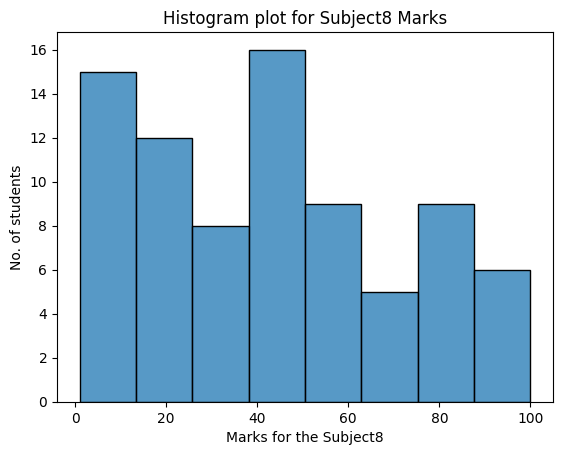

In [74]:
# ploting a histogram plot to understand the given data for further analysis

sbn.histplot(x='Subject8', data=my_df)

# Add a title and axis labels

plt.title('Histogram plot for Subject8 Marks')
plt.xlabel('Marks for the Subject8')
plt.ylabel('No. of students')

# Show the plot

plt.show()

In [16]:
# Finding categorical variables

categorical_features=[feature for feature in my_df.columns if (my_df[feature].dtypes=='O')]
print(f'There are {len(categorical_features)} categorical variables')
categorical_features

There are 2 categorical variables


['Class', 'StudentName']

Obsrvation : It is not possible to implement the categorical varaibles to the machine learning models to make predictions So i skipped these two variables

# Implementing Machine Learning Models to Predict the Student Performance

In [23]:
# importing the required libraries for implementing the machine learning models

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 
 Here I am taking input variables are from all subjects except subject8 and subject8 could be taken as target variable.

  In the dataset thier are two categorical features present in the given data set are 'Class', 'StudentName' and for implementation of machine learning models only applicable for numerical features to make predictions, so I used 'iloc' indexer to take from the numeric features which are start from 4th column upto subject7 and subject8 be taken as the target variable

# Linear Regression Model

In [94]:
# selecting the input and target variable 

X = my_df.iloc[:, 4:-1] # here I used the indexer(iloc) to take from the subjects features
y = my_df['Subject8']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create and train a linear regression model
model = LinearRegression()
ab=model.fit(X_train, y_train)

# Make predictions on the test set
y_pred =ab.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error is : ",mse)

Mean Squared Error is :  641.0375227045033


# Discretization
Discretization is the process of converting continuous data into discrete intervals or bins. This is often done to simplify data analysis, make it suitable for reducing the mean squared error and reduce the impact of noise in the data.

In [101]:
# Here I used binnig it is one of the type in discretization

# Apply binning to the subject8 to reduce mean squared error

num_bins = 8

X_binned = pd.cut(my_df['Subject8'], bins=num_bins, labels=False)

# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_binned.values.reshape(-1, 1), y, test_size=0.20,random_state=0)

# fitting the data to the linear regression model

model_bin = LinearRegression()
model_bin.fit(X_train, y_train)

# testing the data for predictions

y_pred_bin = model_bin.predict(X_test)

# Calculating the mean squared error to evaluate the students performance 

mse_bin = mean_squared_error(y_test, y_pred_bin)
print(f'Binned Mean Squared Error : ',mse_bin)


Binned Mean Squared Error :  8.521757031419513


Observation : After Discritizing the data, the Mean Squared Error reduced from 641 to 8.5 for the Linear Regression Model.